In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
print("torch version: {}".format(torch.__version__))

torch version: 2.7.1+cpu


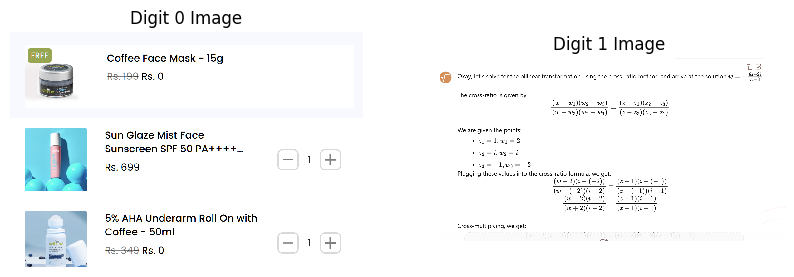

In [6]:
digit_0_array_og = cv2.imread(r"C:\Programming\Projects\Learn\pytorch\Screenshot 2025-05-09 024555.png")
digit_1_array_og = cv2.imread(r"C:\Programming\Projects\Learn\pytorch\Screenshot 2025-05-15 025911.png")

digit_0_array_gray = cv2.imread(r"C:\Programming\Projects\Learn\pytorch\Screenshot 2025-05-09 024555.png",cv2.IMREAD_GRAYSCALE )
digit_1_array_gray = cv2.imread(r"C:\Programming\Projects\Learn\pytorch\Screenshot 2025-05-15 025911.png",cv2.IMREAD_GRAYSCALE )

# Visualize the image

fig, axs = plt.subplots(1,2, figsize=(10,5))


axs[0].imshow(digit_0_array_og, cmap='gray',interpolation='none')
axs[0].set_title("Digit 0 Image")
axs[0].axis('off')

axs[1].imshow(digit_1_array_og, cmap="gray", interpolation = 'none')
axs[1].set_title("Digit 1 Image")
axs[1].axis('off')

plt.show()

In [5]:
digit_0_array_og = cv2.imread(r"C:\Programming\Projects\Learn\pytorch\Screenshot 2025-05-09 024555.png")
digit_1_array_og = cv2.imread(r"C:\Programming\Projects\Learn\pytorch\Screenshot 2025-05-15 025911.png")

#Numpy array with three channels
print("Image array shape: ",digit_0_array_og.shape)
print(f"Min pixel value:{np.min(digit_0_array_og)} ; Max pixel value : {np.max(digit_0_array_og)}")

Image array shape:  (755, 1131, 3)
Min pixel value:0 ; Max pixel value : 255


In [7]:
digit_0_array_gray

array([[250, 250, 250, ..., 250, 250, 250],
       [250, 250, 250, ..., 250, 250, 250],
       [250, 250, 250, ..., 250, 250, 250],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]],
      shape=(755, 1131), dtype=uint8)

In [8]:
#npy array to pytorch tensor

img_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32) / 255.0
img_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32) / 255.0


In [10]:
print("Shape of Normalised Digit 0 Tensor: ", img_tensor_0.shape)
print(f"Normalised Min pixel value: {torch.min(img_tensor_0)} ; Normalised Max pixel value : {torch.max(img_tensor_0)}")

Shape of Normalised Digit 0 Tensor:  torch.Size([755, 1131, 3])
Normalised Min pixel value: 0.0 ; Normalised Max pixel value : 1.0


In [14]:
import torch.nn.functional as F

# Resize both tensors to the same shape (e.g., shape of img_tensor_0)
target_shape = img_tensor_0.shape[:2]  # (height, width)
img_tensor_1_resized = F.interpolate(img_tensor_1.permute(2, 0, 1).unsqueeze(0), size=target_shape, mode='bilinear', align_corners=False).squeeze(0).permute(1, 2, 0)

# Now stack
batch_tensor = torch.stack([img_tensor_0, img_tensor_1_resized])
print("btach tensor shape: ", batch_tensor.shape)

btach tensor shape:  torch.Size([2, 755, 1131, 3])


In [15]:
batch_input = batch_tensor.permute(0,3,1,2)
print("btach tensor shape: ", batch_input.shape)

btach tensor shape:  torch.Size([2, 3, 755, 1131])
